In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import mode, norm, skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [3]:
data = pd.read_csv('road_accident.csv')
data.head()

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
0,2013-02-04,Morning,Uttar Pradesh,Rainy,Under Construction,10,Drunk Driving
1,2005-02-23,Night,Tripura,Clear,Under Construction,3,Weather Conditions
2,2014-10-08,Afternoon,Odisha,Clear,Fine,6,Poor Visibility
3,2015-01-14,Night,Jharkhand,Rainy,Rough,8,Road Conditions
4,2006-01-17,Afternoon,Kerala,Clear,Fine,2,Speeding


In [4]:
data.shape

(50000, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AccidentDate      50000 non-null  object
 1   Timing            50000 non-null  object
 2   State             50000 non-null  object
 3   WeatherCondition  50000 non-null  object
 4   RoadCondition     50000 non-null  object
 5   Deaths            50000 non-null  int64 
 6   Reason            50000 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [6]:
data.describe()

,Deaths
count,50000.000000
mean,4.983040
std,3.160581
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,10.000000


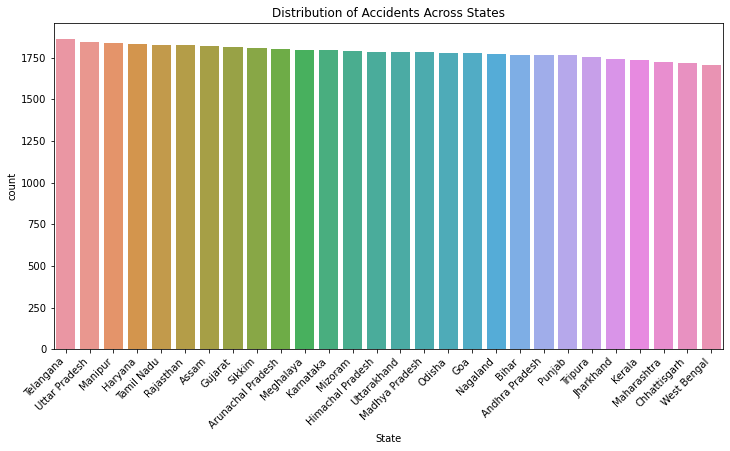

In [7]:
# Explore the distribution of accidents across different states
plt.figure(figsize=(12, 6))
sns.countplot(x="State", data=data, order=data['State'].value_counts().index)
plt.title("Distribution of Accidents Across States")
plt.xticks(rotation=45, ha="right")
plt.show()

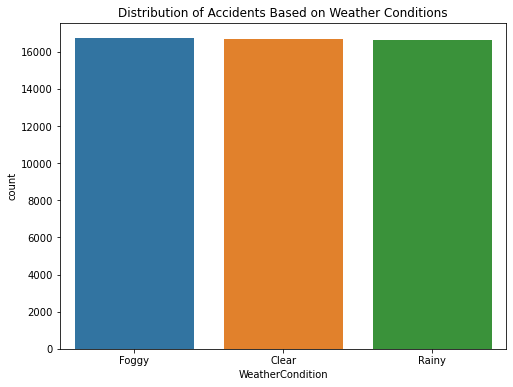

In [8]:
# Explore the distribution of accidents based on weather conditions
plt.figure(figsize=(8, 6))
sns.countplot(x="WeatherCondition", data=data, order=data['WeatherCondition'].value_counts().index)
plt.title("Distribution of Accidents Based on Weather Conditions")
plt.show()

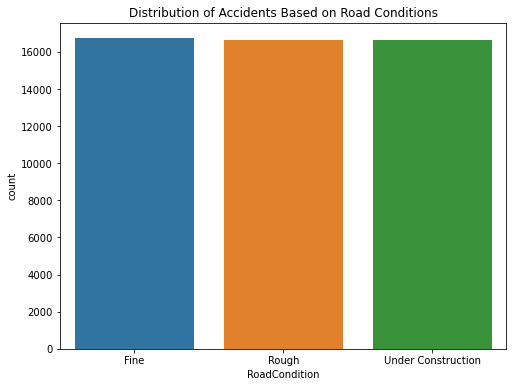

In [9]:
# Explore the distribution of accidents based on road conditions
plt.figure(figsize=(8, 6))
sns.countplot(x="RoadCondition", data=data, order=data['RoadCondition'].value_counts().index)
plt.title("Distribution of Accidents Based on Road Conditions")
plt.show()

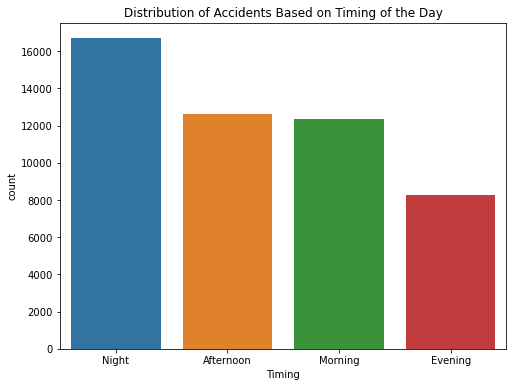

In [10]:
# Explore the distribution of accidents based on the timing of the day
plt.figure(figsize=(8, 6))
sns.countplot(x="Timing", data=data, order=data['Timing'].value_counts().index)
plt.title("Distribution of Accidents Based on Timing of the Day")
plt.show()

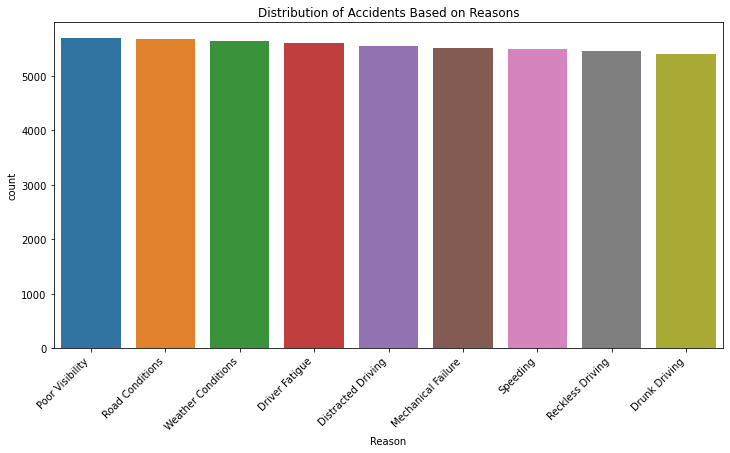

In [11]:
# Explore the reasons for accidents
plt.figure(figsize=(12, 6))
sns.countplot(x="Reason", data=data, order=data['Reason'].value_counts().index)
plt.title("Distribution of Accidents Based on Reasons")
plt.xticks(rotation=45, ha="right")
plt.show()

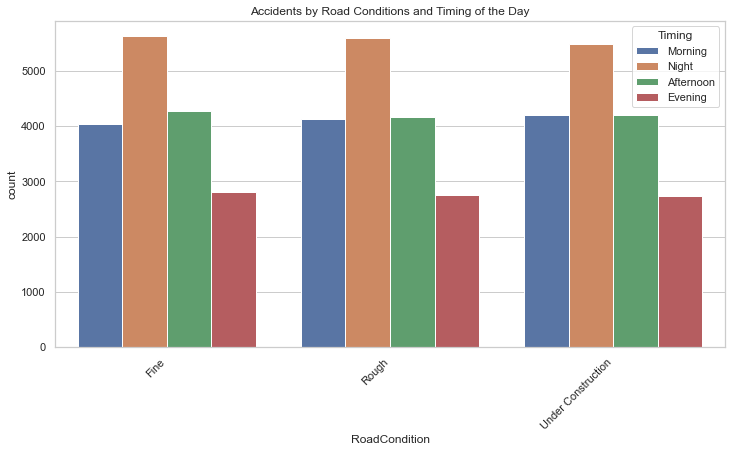

In [12]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Explore patterns related to road conditions
plt.figure(figsize=(12, 6))
sns.countplot(x="RoadCondition", hue="Timing", data=data, order=data['RoadCondition'].value_counts().index)
plt.title("Accidents by Road Conditions and Timing of the Day")
plt.xticks(rotation=45, ha="right")
plt.show()

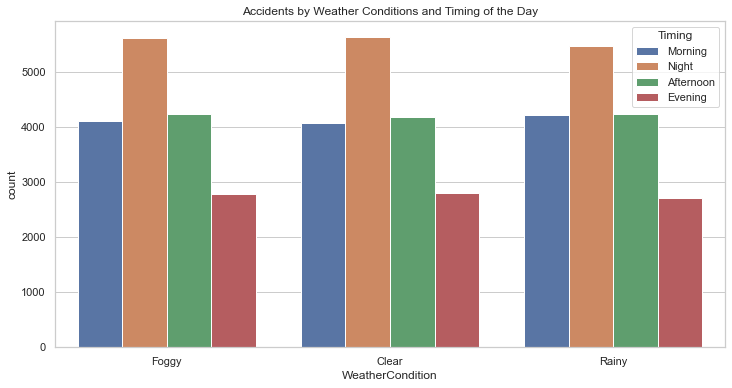

In [13]:
# Explore patterns related to weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(x="WeatherCondition", hue="Timing", data=data, order=data['WeatherCondition'].value_counts().index)
plt.title("Accidents by Weather Conditions and Timing of the Day")
plt.show()

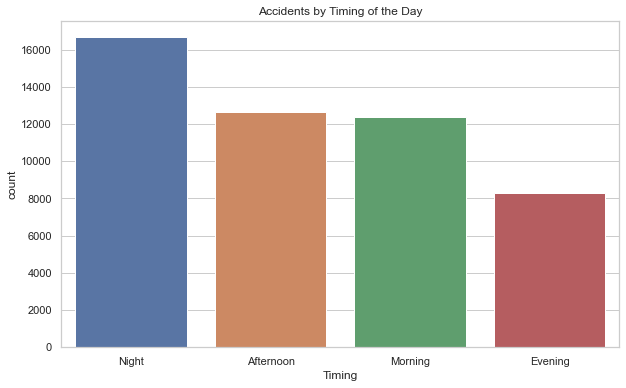

In [14]:
# Explore patterns related to time of day
plt.figure(figsize=(10, 6))
sns.countplot(x="Timing", data=data, order=data['Timing'].value_counts().index)
plt.title("Accidents by Timing of the Day")
plt.show()

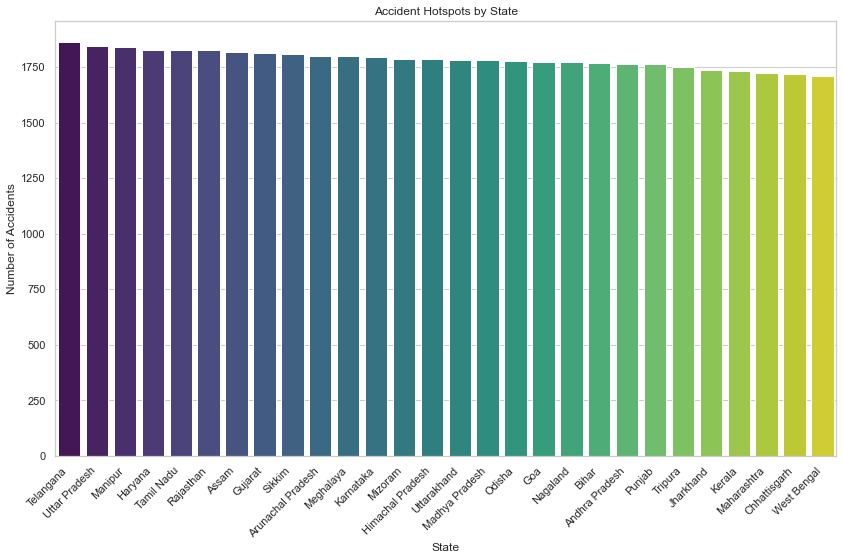

In [15]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Visualize accident hotspots (States with higher accident frequencies)
plt.figure(figsize=(14, 8))
state_accidents = data['State'].value_counts()
sns.barplot(x=state_accidents.index, y=state_accidents.values, palette="viridis")
plt.title("Accident Hotspots by State")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

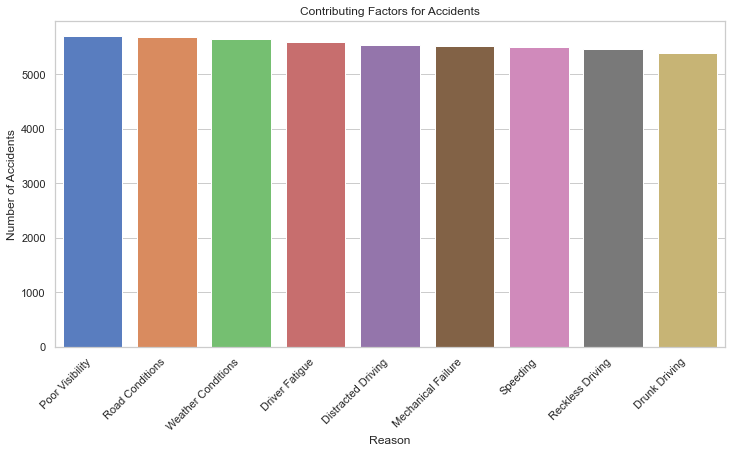

In [16]:
# Visualize contributing factors (Reasons for accidents)
plt.figure(figsize=(12, 6))
reasons_accidents = data['Reason'].value_counts()
sns.barplot(x=reasons_accidents.index, y=reasons_accidents.values, palette="muted")
plt.title("Contributing Factors for Accidents")
plt.xlabel("Reason")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

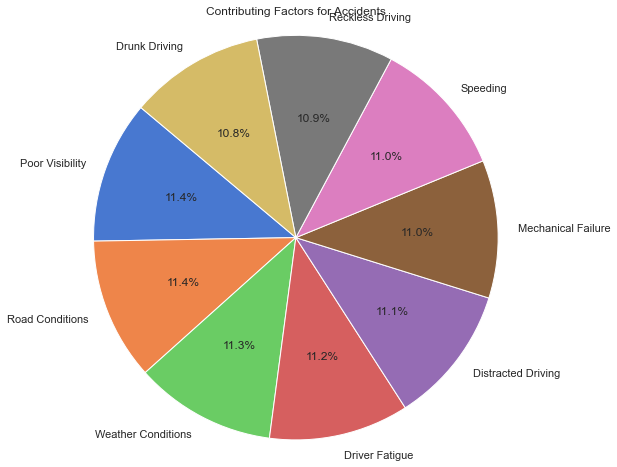

In [17]:
# Visualize contributing factors (Reasons for accidents) in a pie chart
plt.figure(figsize=(8, 8))
reasons_accidents = data['Reason'].value_counts()
plt.pie(reasons_accidents, labels=reasons_accidents.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted", len(reasons_accidents)))
plt.title("Contributing Factors for Accidents")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<Figure size 7200x720 with 0 Axes>

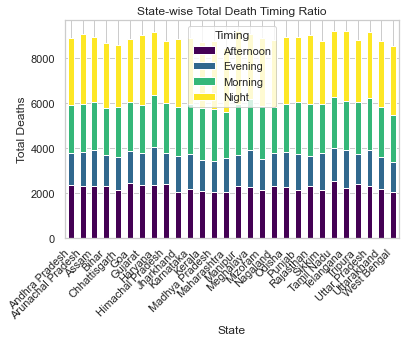

In [18]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Group the data by state and timing, and calculate the total number of deaths
state_timing_deaths = data.groupby(['State', 'Timing'])['Deaths'].sum().reset_index()

# Pivot the table to get a format suitable for plotting
state_timing_deaths_pivot = state_timing_deaths.pivot(index='State', columns='Timing', values='Deaths').fillna(0)

# Create a bar plot for state-wise total death timing ratio
plt.figure(figsize=(100, 10))
state_timing_deaths_pivot.plot(kind='bar', stacked=True, colormap="viridis")
plt.title("State-wise Total Death Timing Ratio")
plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Timing")
plt.show()

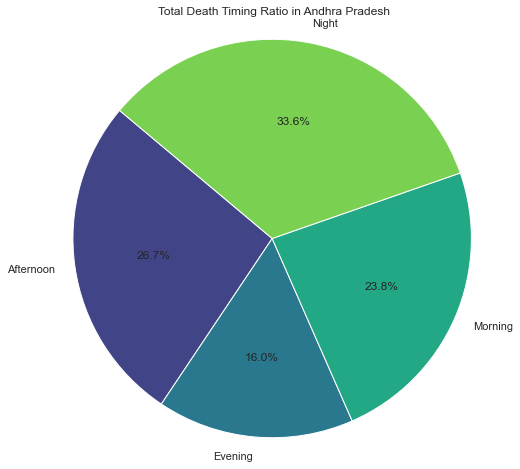

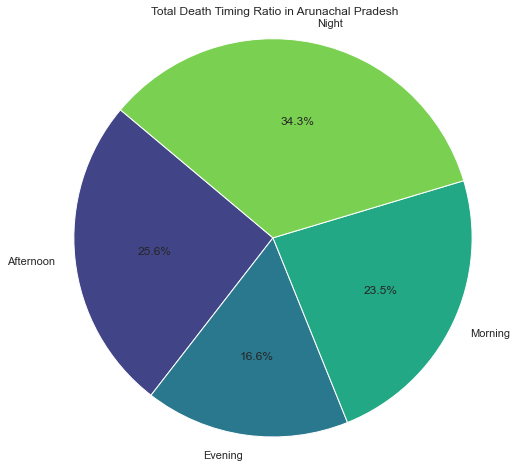

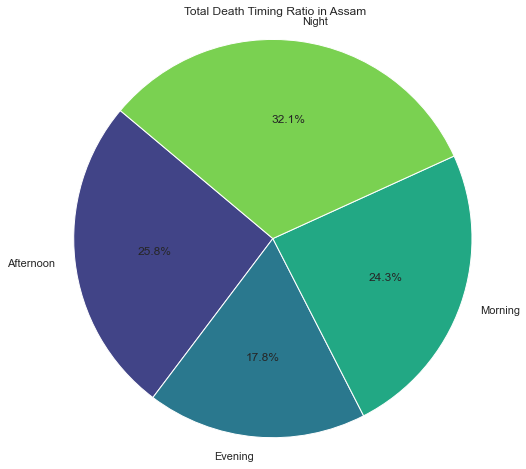

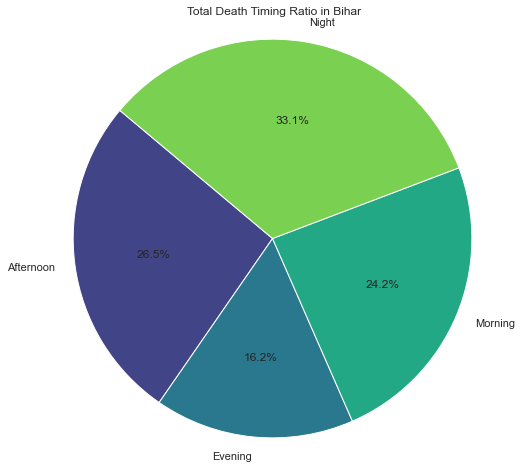

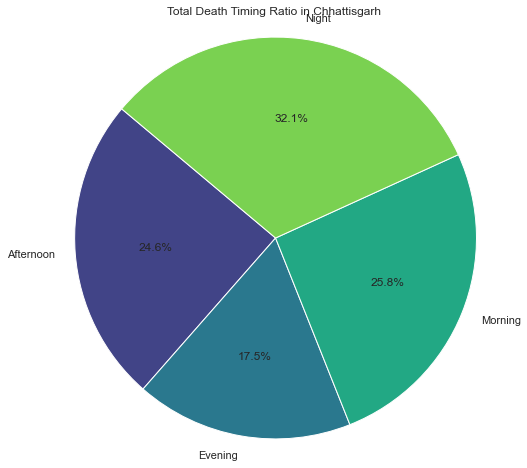

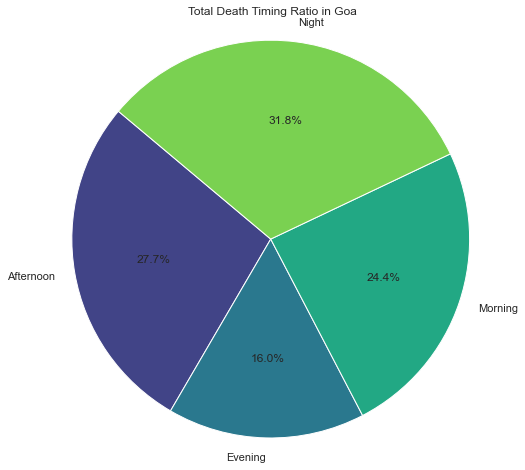

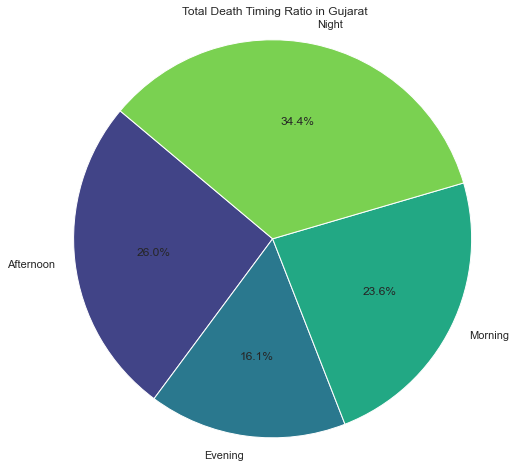

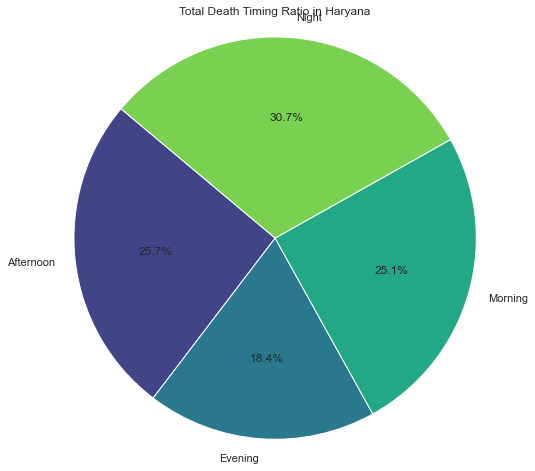

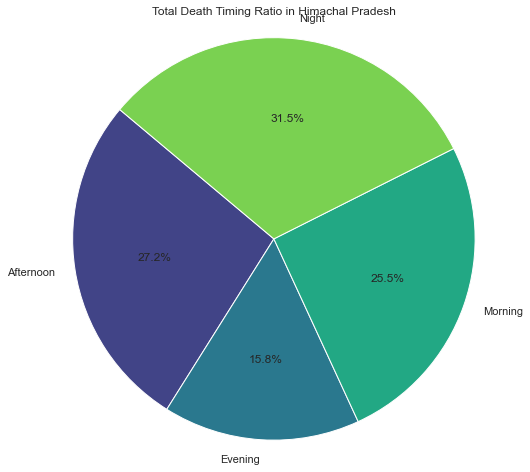

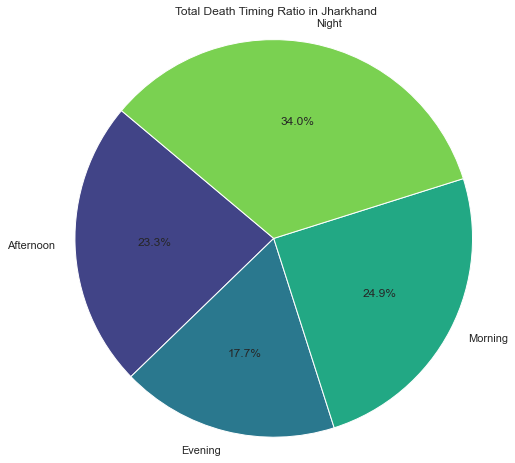

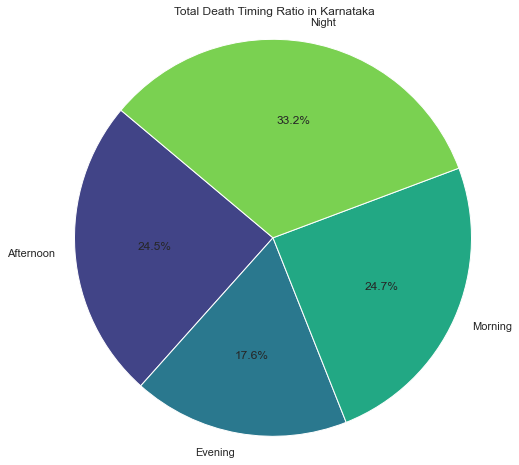

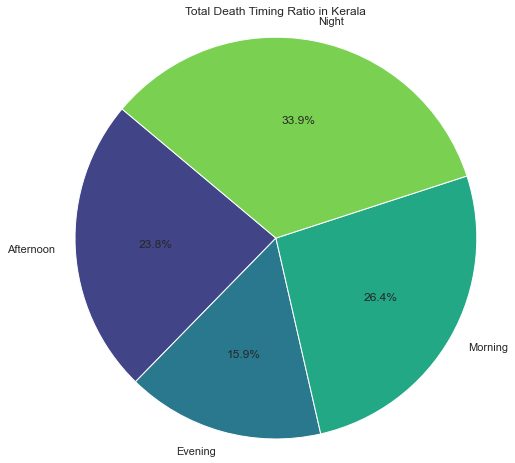

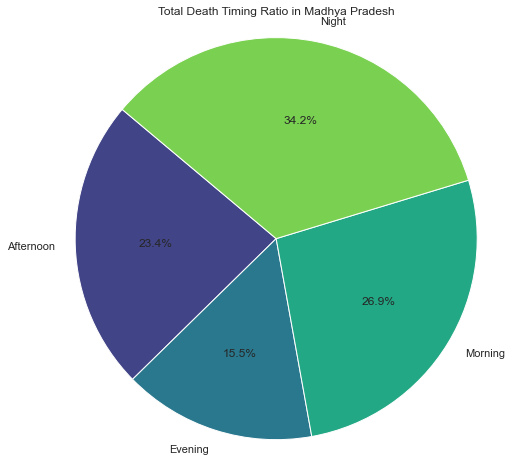

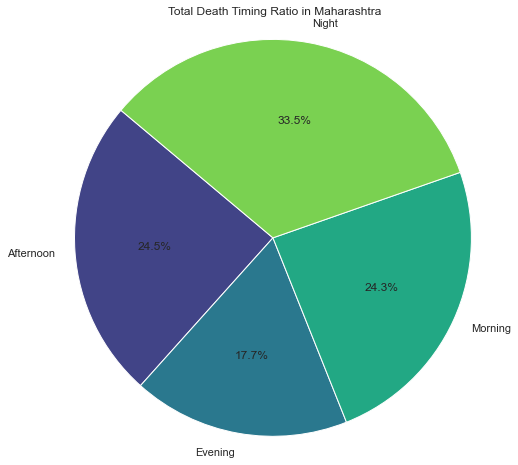

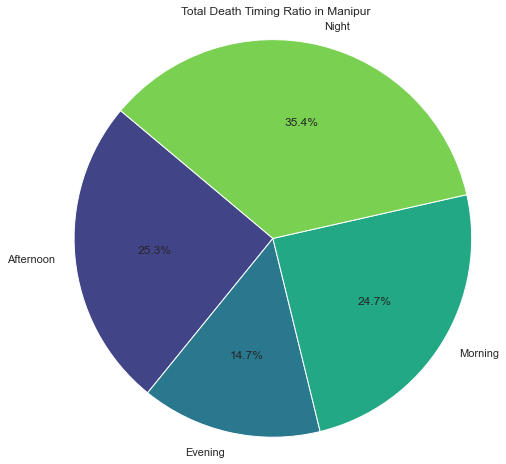

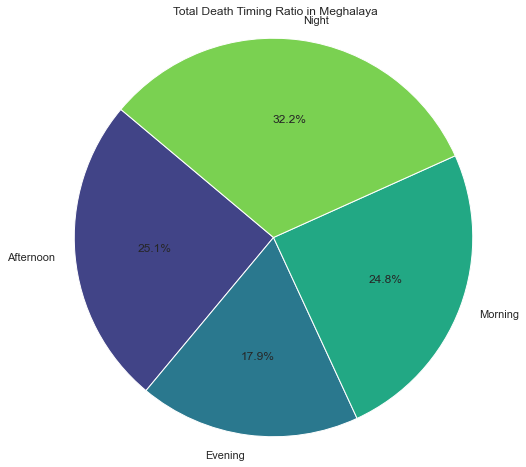

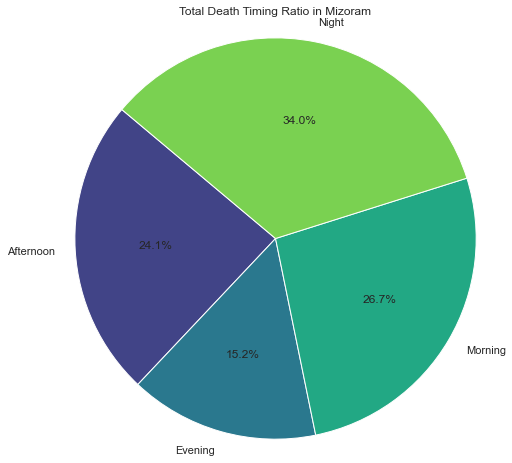

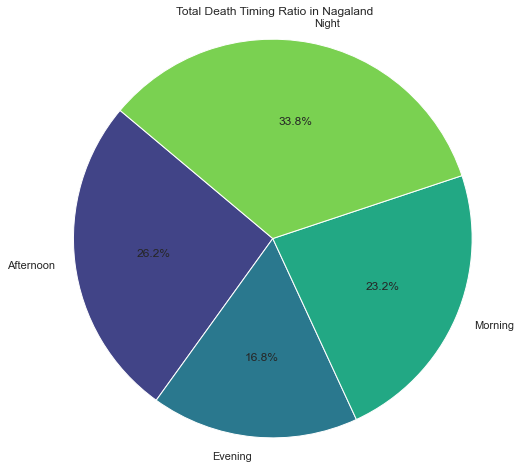

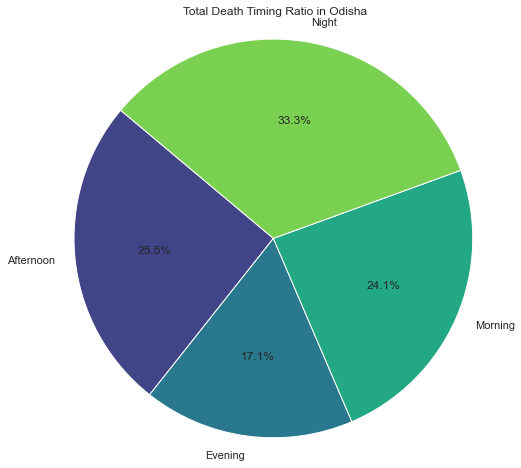

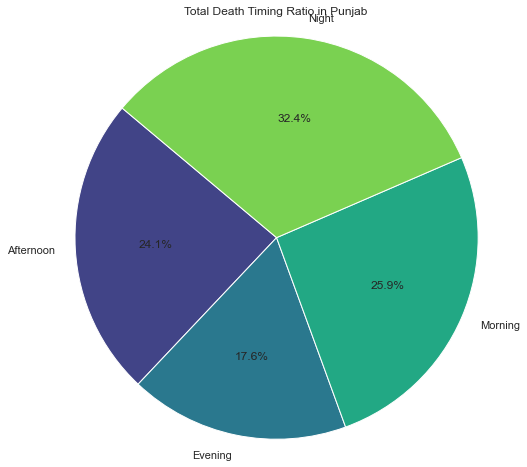

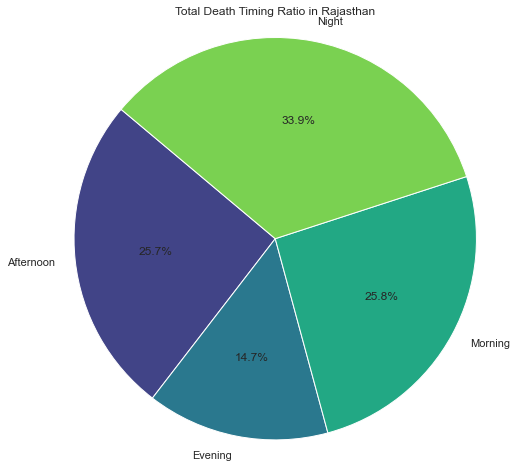

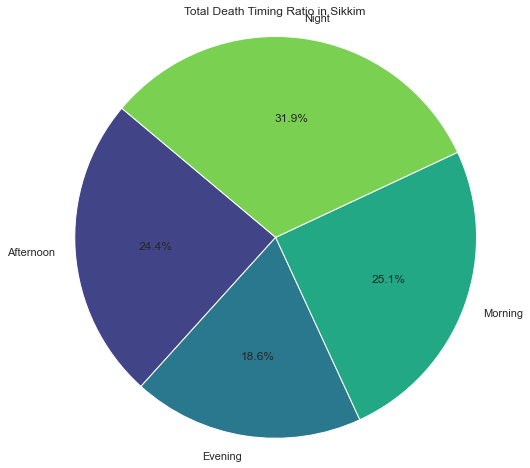

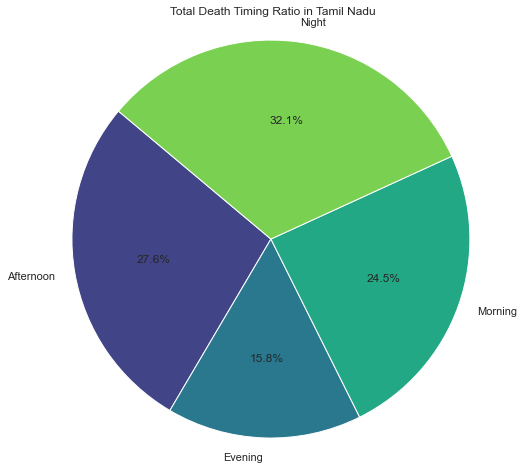

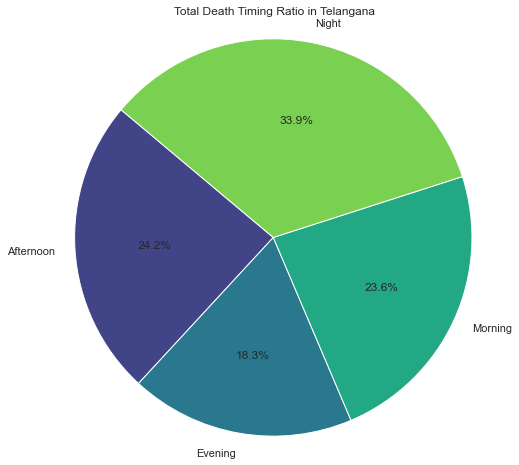

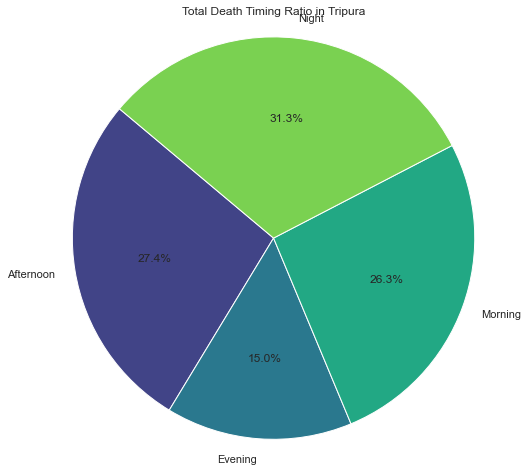

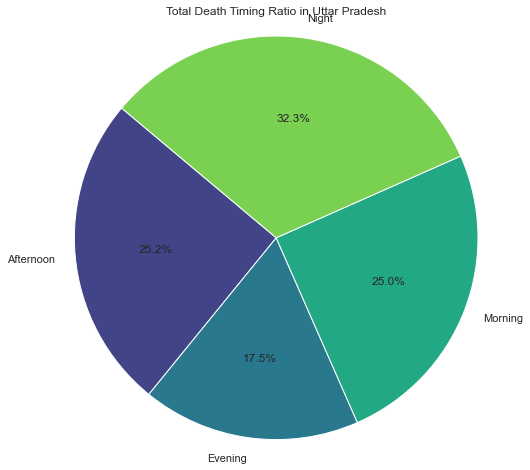

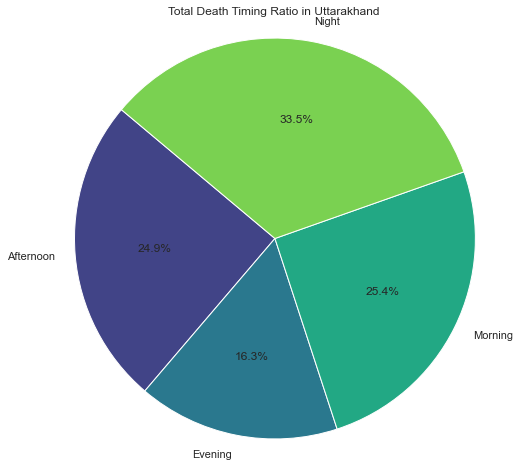

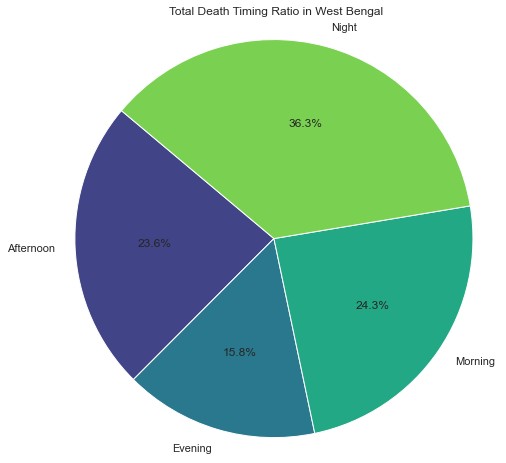

In [19]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Group the data by state and timing, and calculate the total number of deaths
state_timing_deaths = data.groupby(['State', 'Timing'])['Deaths'].sum().reset_index()

# Pivot the table to get a format suitable for plotting
state_timing_deaths_pivot = state_timing_deaths.pivot(index='State', columns='Timing', values='Deaths').fillna(0)

# Iterate over each state and create pie chart
for state in state_timing_deaths_pivot.index:
    plt.figure(figsize=(8, 8))
    state_data = state_timing_deaths_pivot.loc[[state]]
    plt.pie(state_data.values.flatten(), labels=state_data.columns, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(state_data.columns)))
    plt.title(f"Total Death Timing Ratio in {state}")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()